#**LOAD DATA**



In [1]:
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [2]:
delaney = pd.read_csv('/content/delaney_solubility_with_descriptors.csv')

In [3]:
delaney.head().reset_index(drop=True)

,MolLogP,MolWt,NumRotatableBonds,AromaticProportion,logS
0,2.5954,167.850,0.0,0.0,-2.18
1,2.3765,133.405,0.0,0.0,-2.00
2,2.5938,167.850,1.0,0.0,-1.74
3,2.0289,133.405,1.0,0.0,-1.48
4,2.9189,187.375,1.0,0.0,-3.04


# **DATA SEPARATION**


In [9]:
x = delaney.drop('logS', axis=1)
y = delaney['logS']


#**DATA SPLITTING**


In [10]:
import sklearn.model_selection as ms
x_train, x_test, y_train, y_test = ms.train_test_split(x, y, test_size=0.2, random_state= 100)

In [12]:
x_train, x_test, y_train, y_test = ms.train_test_split(
    x,
    y,
    test_size=0.2,
    random_state=100  )

In [13]:
x_test


,MolLogP,MolWt,NumRotatableBonds,AromaticProportion
822,2.91000,172.268,7.0,0.000000
118,7.27400,360.882,1.0,0.666667
347,1.94040,145.161,0.0,0.909091
1123,1.98640,119.378,0.0,0.000000
924,1.70062,108.140,0.0,0.750000
...,...,...,...,...
1114,1.76210,478.513,4.0,0.000000
427,6.32820,276.338,0.0,1.000000
711,0.04430,218.205,5.0,0.000000
4,2.91890,187.375,1.0,0.000000


In [14]:
y_test

,logS
822,-3.380
118,-8.010
347,-2.160
1123,-1.170
924,-0.730
...,...
1114,-4.130
427,-9.018
711,-0.600
4,-3.040


# **BUILDING MODEL**


## **LINEAR REGRESSION**

**Training the Model**

In [15]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

###**Applying the model to make a prediction**

In [16]:
y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)

In [17]:
y_lr_test_pred

array([-3.05722870e+00, -7.77785827e+00, -2.55016650e+00, -2.01523582e+00,
       -2.06375990e+00, -9.99672215e-01, -5.94603364e-01, -5.53626003e-01,
       -5.72200956e+00, -3.94006681e+00, -3.95496755e+00, -2.29737009e+00,
       -1.48980354e+00, -1.48988982e+00, -4.64510806e+00, -1.90396018e+00,
       -1.51566313e+00, -3.16424605e+00, -3.70863920e+00, -5.58105660e+00,
       -3.25038467e+00, -5.04235077e+00, -5.69194881e+00, -2.14339849e+00,
       -4.35689341e+00, -5.03964756e+00, -3.10383618e+00, -4.40286964e+00,
       -4.21276272e+00,  5.56508349e-01, -1.45537678e+00, -4.41027396e+00,
       -2.59668773e+00, -1.53336276e+00, -5.55749874e-01, -1.67111795e+00,
       -2.78163675e+00, -3.15395565e+00, -5.27083361e+00, -1.75321446e+00,
       -1.53350725e+00, -2.01255666e+00, -6.57559167e+00, -7.89433046e+00,
       -5.76437127e+00, -4.16422068e+00, -3.43694663e+00,  1.43834212e+00,
       -1.12679105e-02, -2.34521849e+00, -1.86480046e+00, -5.03964756e+00,
        8.55886378e-01, -

In [18]:
y_lr_train_pred

array([-2.83668969,  0.84208401, -0.50930302, -0.13058053, -1.6269208 ,
       -2.86103037, -2.32208333, -4.16684323, -5.04235077, -2.29737009,
       -3.15082845, -4.33037208, -1.43700682, -2.59060064, -7.09025955,
       -2.32734557, -4.19073421, -2.63904005, -3.58104074, -3.75929058,
       -2.5501665 , -3.26968347, -2.78911367, -2.69251051, -0.77437547,
       -6.61955792, -2.99084623, -2.36975061, -7.18167736, -1.52816491,
       -4.81736265, -0.86996608, -7.09025955, -1.87404275, -2.58013247,
       -4.80953284, -4.17454084, -1.95444152, -3.50503339, -2.7411418 ,
       -1.87131835, -2.45270806, -3.07252433, -1.48988982, -3.98778754,
       -1.35216679, -0.16932277, -6.05237002, -3.29550658,  0.30513174,
       -3.25501463, -5.31993586, -0.4733928 , -4.79180882, -5.82486323,
       -2.70343539, -3.70838271, -2.4987341 , -2.12301018, -3.11393974,
       -2.79842053, -1.38274662, -4.3267103 , -3.57778946, -3.42356884,
       -9.15826626, -6.52588866, -1.75832085, -4.97842312, -1.59

### **Evaluate model Performance**

In [23]:
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

lr_train_mse = mean_squared_error(y_train, y_lr_train_pred)
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

In [24]:
print('LR Mean Squared Error (Train): ', lr_train_mse)
print('LR R2 Score (Train): ', lr_train_r2)
print('LR Mean Squared Error (Test): ', lr_test_mse)
print('LR R2 Score (Test): ', lr_test_r2)

LR Mean Squared Error (Train):  1.0075362951093687
LR R2 Score (Train):  0.7645051774663391
LR Mean Squared Error (Test):  1.0206953660861033
LR R2 Score (Test):  0.7891616188563282


In [25]:
lr_results = pd.DataFrame(['Linear Regression', lr_train_mse, lr_train_r2, lr_test_mse, lr_test_r2]).transpose()
lr_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']

In [26]:
lr_results.reset_index(drop=True)

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,1.007536,0.764505,1.020695,0.789162


## **RANDOM FOREST**

In [22]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(max_depth=2, random_state=100)
rf.fit(x_train, y_train)

RandomForestRegressor(max_depth=2, random_state=100)

###**Applying the model to make a prediction**

In [27]:
y_rf_train_pred = rf.predict(x_train)
y_rf_test_pred = rf.predict(x_test)

###**Evaluate model performance**


In [28]:
from sklearn.metrics import mean_squared_error, r2_score


rf_train_mse = mean_squared_error(y_train, y_rf_train_pred)
rf_train_r2 = r2_score(y_train, y_rf_train_pred)

rf_test_mse = mean_squared_error(y_test, y_rf_test_pred)
rf_test_r2 = r2_score(y_test, y_rf_test_pred)

In [30]:
rf_results = pd.DataFrame(['Random Forest', rf_train_mse, rf_train_r2, rf_test_mse, rf_test_r2]).transpose()
rf_results.columns = ['Method', 'Training MSE', 'Training R2', 'Test MSE', 'Test R2']
rf_results.reset_index(drop=True)

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Random Forest,1.028228,0.759669,1.407688,0.709223


#**Model Comparison**

In [36]:

df_models = pd.concat([lr_results, rf_results], axis = 0).reset_index(drop=True)
df_models

,Method,Training MSE,Training R2,Test MSE,Test R2
0,Linear Regression,1.007536,0.764505,1.020695,0.789162
1,Random Forest,1.028228,0.759669,1.407688,0.709223


#**DATA VISUALIZATION OF PREDICTION VALUES**

##**Linear Regression Model**

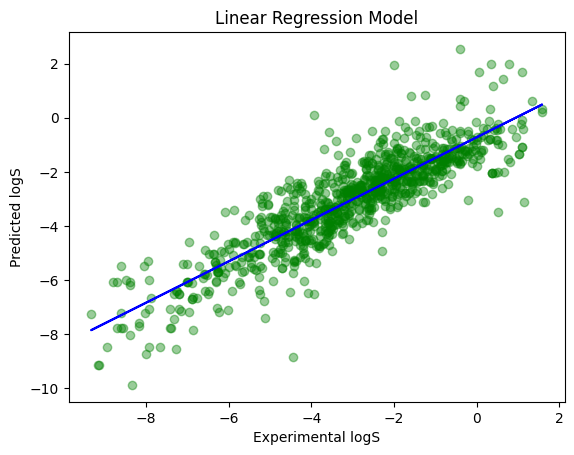

In [47]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(x=y_train, y=y_lr_train_pred, color='green', alpha=0.4)

z = np.polyfit(y_train, y_lr_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), color='blue')

plt.xlabel('Experimental logS');
plt.ylabel('Predicted logS');
plt.title('Linear Regression Model');

##**Random Forest Model**

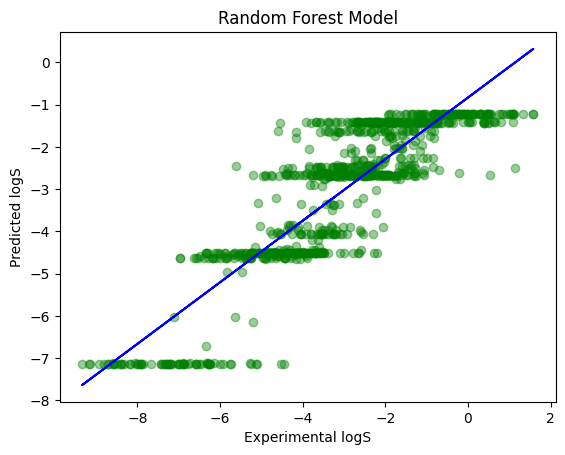

In [50]:
import matplotlib.pyplot as plt
import numpy as np

plt.scatter(x=y_train, y=y_rf_train_pred, color='green', alpha=0.4)

z = np.polyfit(y_train, y_rf_train_pred, 1)
p = np.poly1d(z)

plt.plot(y_train, p(y_train), color='blue')

plt.xlabel('Experimental logS');
plt.ylabel('Predicted logS');
plt.title('Random Forest Model');